# Self-Driving Car Engineer Nanodegree

## Deep Learning

## Project: Build a Traffic Sign Recognition Classifier

In this notebook, a template is provided for you to implement your functionality in stages which is required to successfully complete this project. If additional code is required that cannot be included in the notebook, be sure that the Python code is successfully imported and included in your submission, if necessary. Sections that begin with **'Implementation'** in the header indicate where you should begin your implementation for your project. Note that some sections of implementation are optional, and will be marked with **'Optional'** in the header.

In addition to implementing code, there will be questions that you must answer which relate to the project and your implementation. Each section where you will answer a question is preceded by a **'Question'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide.

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

---
## Step 0: Load The Data

In [1]:
# Load pickled data
import pickle
import csv
import pprint
import cv2
import numpy as np
import matplotlib.pyplot as plt
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.contrib.layers import flatten
import matplotlib.gridspec as gridspec

# TODO: Fill this in based on where you saved the training and testing data

training_file = "./raw_data/train.p"
testing_file = "./raw_data/test.p"

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
x_train, y_train = train['features'], train['labels']
x_test, y_test = test['features'], test['labels']

# CSV file for sign names
names_file = "./raw_data/signnames.csv"

# Load class names into dictionary
with open(names_file, mode='r') as f:
    reader = csv.reader(f)
    next(reader)  # skip the header
    signnames = {rows[0]: rows[1] for rows in reader}

# Shuffle data used in model training
x_train, y_train = shuffle(x_train, y_train)

# Make sure the x and y data have same length
assert (len(x_train) == len(y_train))
assert (len(x_test) == len(y_test))

---

## Step 1: Dataset Summary & Exploration

The pickled data is a dictionary with 4 key/value pairs:

- `'features'` is a 4D array containing raw pixel data of the traffic sign images, (num examples, width, height, channels).
- `'labels'` is a 2D array containing the label/class id of the traffic sign. The file `signnames.csv` contains id -> name mappings for each id.
- `'sizes'` is a list containing tuples, (width, height) representing the the original width and height the image.
- `'coords'` is a list containing tuples, (x1, y1, x2, y2) representing coordinates of a bounding box around the sign in the image. **THESE COORDINATES ASSUME THE ORIGINAL IMAGE. THE PICKLED DATA CONTAINS RESIZED VERSIONS (32 by 32) OF THESE IMAGES**

Complete the basic data summary below.

In [2]:
### Replace each question mark with the appropriate value.

# TODO: Number of training examples
n_train = len(x_train)

# TODO: Number of testing examples.
n_test = len(x_test)

# TODO: What's the shape of an traffic sign image?
image_shape = x_train[0].shape

# TODO: How many unique classes/labels there are in the dataset.
n_classes = len(set(y_train))

print("Number of training examples =", n_train)
print("Number of testing examples =", n_test)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)

# Count the number of examples in each class and print them in detail with class description
unique, counts = np.unique(y_train, return_counts=True)
class_info = {}
for unique, counts in zip(unique, counts):
    class_info[str(unique)] = {'description': signnames[str(unique)], 'count': counts}

pp = pprint.PrettyPrinter(indent=4, width=100)
print("Example Count in Each Class\n")
pp.pprint(class_info)

Number of training examples = 39209
Number of testing examples = 12630
Image data shape = (32, 32, 3)
Number of classes = 43
Example Count in Each Class

{   '0': {'count': 210, 'description': 'Speed limit (20km/h)'},
    '1': {'count': 2220, 'description': 'Speed limit (30km/h)'},
    '10': {'count': 2010, 'description': 'No passing for vehicles over 3.5 metric tons'},
    '11': {'count': 1320, 'description': 'Right-of-way at the next intersection'},
    '12': {'count': 2100, 'description': 'Priority road'},
    '13': {'count': 2160, 'description': 'Yield'},
    '14': {'count': 780, 'description': 'Stop'},
    '15': {'count': 630, 'description': 'No vehicles'},
    '16': {'count': 420, 'description': 'Vehicles over 3.5 metric tons prohibited'},
    '17': {'count': 1110, 'description': 'No entry'},
    '18': {'count': 1200, 'description': 'General caution'},
    '19': {'count': 210, 'description': 'Dangerous curve to the left'},
    '2': {'count': 2250, 'description': 'Speed limit (50k

Visualize the German Traffic Signs Dataset using the pickled file(s). This is open ended, suggestions include: plotting traffic sign images, plotting the count of each sign, etc.

The [Matplotlib](http://matplotlib.org/) [examples](http://matplotlib.org/examples/index.html) and [gallery](http://matplotlib.org/gallery.html) pages are a great resource for doing visualizations in Python.

**NOTE:** It's recommended you start with something simple first. If you wish to do more, come back to it after you've completed the rest of the sections.


Completed plotting the first image


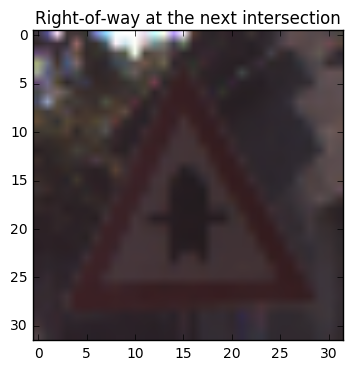

In [3]:
### Data exploration visualization goes here.
# Visualizations will be shown in the notebook.
%matplotlib inline

#
# Plot the first image
#
plt.figure(1)
# plt.imshow(x_train[0].squeeze(), cmap='gray')
plt.imshow(x_train[0])
plt.title(class_info[str(y_train[0])]['description'])
plt.savefig('./images/first_image')
print('\nCompleted plotting the first image')

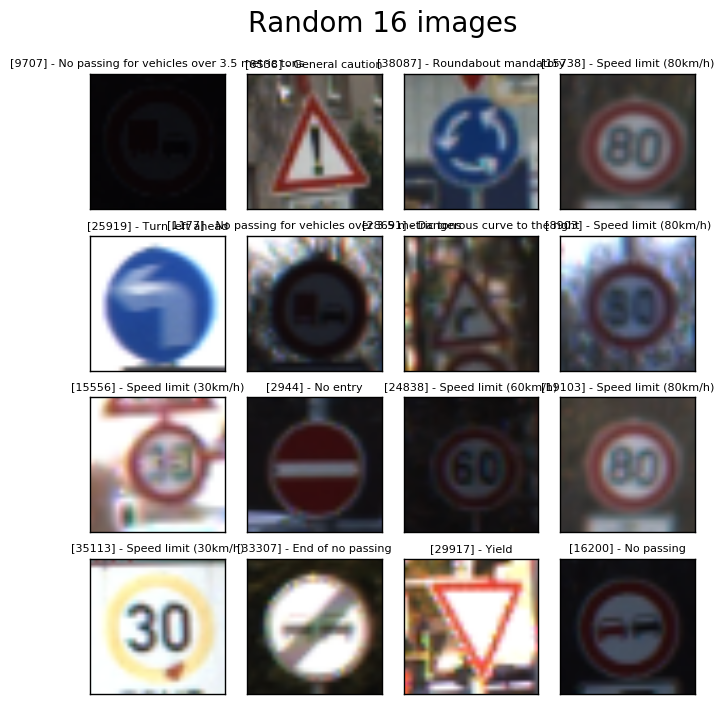


Completed plotting the random 16 images


In [4]:
#
# Plot random 16 images
#
plt.figure(2)
grid = np.random.randint(n_train, size=(4, 4))
fig, axes = plt.subplots(4, 4, figsize=(8, 8), subplot_kw={'xticks': [], 'yticks': []})
fig.subplots_adjust(hspace=0.2, wspace=0.05)
fig.suptitle('Random 16 images', fontsize=20)
for ax, i in zip(axes.flat, list(grid.reshape(16, 1))):
    # ax.imshow(x_train[int(i)].squeeze(), cmap='gray')
    ax.imshow(x_train[int(i)])
    title = str(i) + " - " + class_info[str(y_train[int(i)])]['description']
    ax.set_title(title, fontsize=8)
plt.show()
plt.savefig('./images/16_random_images')
plt.close()
print('\nCompleted plotting the random 16 images')

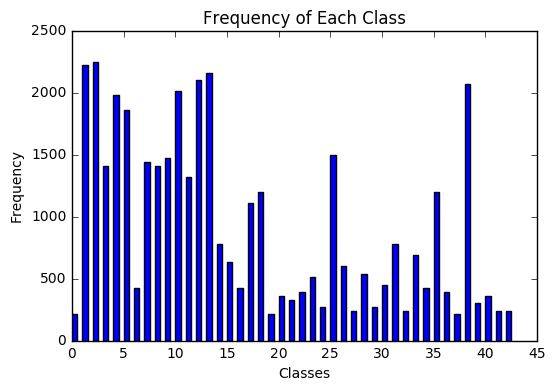


Completed plotting class frequency bar plot


In [5]:
#
# Bar plot showing the count of each class in the training set
#
unique, counts = np.unique(y_train, return_counts=True)
plt.figure(3)
plt.bar(unique, counts, 0.5, color='b')
plt.xlabel('Classes')
plt.ylabel('Frequency')
plt.title('Frequency of Each Class')
plt.show()
plt.savefig('./images/class_freq_plot')
print('\nCompleted plotting class frequency bar plot')

As can be seen in the  histogram plot above, there is class imbalance in the training data. Some classes have over 1500 examples and some have below 500 examples. This can hurt the testing accuracy of the model. 

----

## Step 2: Design and Test a Model Architecture

Design and implement a deep learning model that learns to recognize traffic signs. Train and test your model on the [German Traffic Sign Dataset](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset).

There are various aspects to consider when thinking about this problem:

- Neural network architecture
- Play around preprocessing techniques (normalization, rgb to grayscale, etc)
- Number of examples per label (some have more than others).
- Generate fake data.

Here is an example of a [published baseline model on this problem](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf). It's not required to be familiar with the approach used in the paper but, it's good practice to try to read papers like these.

**NOTE:** The LeNet-5 implementation shown in the [classroom](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) at the end of the CNN lesson is a solid starting point. You'll have to change the number of classes and possibly the preprocessing, but aside from that it's plug and play!

### Implementation

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project. Once you have completed your implementation and are satisfied with the results, be sure to thoroughly answer the questions that follow.

In [6]:
def grayscale(img):
    """
    Applies the Grayscale transform
    This will return an image with only one color channel
    but NOTE: to see the returned image as grayscale
    you should call plt.imshow(gray, cmap='gray')
    :param img: image to be converted to grayscale
    :return: image in grayscale
    """
    return cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

In [7]:
def hist_equalize(img):
    """
    Improve the contrast of image
    Helps distribute the range of color in the image
    Read more at
    http://docs.opencv.org/trunk/d5/daf/tutorial_py_histogram_equalization.html
    :param img:
    :return:
    """
    return cv2.equalizeHist(img)

In [8]:
def normalize_scale(img):
    """
    Normalize images by subtracting mean and dividing by the range so that pixel values are between -0.5 and 0.5
    :param img:
    :return:
    """
    # normalized_image = np.divide(img - 125.0, 255.0)
    normalized_image = (img - 125.0) / 255.0
    return normalized_image

In [9]:
def pre_processing(img_list):
    """
    Call the grayscale, histogram equalization and normalization functions in the order and return images
    with single channel
    :param img_list:
    :return:
    """
    count = len(img_list)
    shape = img_list[0].shape
    processed = []

    for i in range(count):
        img = normalize_scale(hist_equalize(grayscale(img_list[i])))
        processed.append(img)
    
    print("\nPreprocessing of images complete..\n")
    
    return np.reshape(np.array(processed), [count, shape[0], shape[1], 1])

In [10]:
def image_augmentation(img):

    # References
    # Geometric Transformations
    # http://opencv-python-tutroals.readthedocs.io/en/latest/py_tutorials/py_imgproc/py_geometric_transformations/py_geometric_transformations.html
    # Morphological Transformation
    # http://opencv-python-tutroals.readthedocs.io/en/latest/py_tutorials/py_imgproc/py_morphological_ops/py_morphological_ops.html
    # Smoothing Images
    # http://opencv-python-tutroals.readthedocs.io/en/latest/py_tutorials/py_imgproc/py_filtering/py_filtering.html

    # Perform smoothing or morphological transformation
    # picker = np.random.randint(low=0, high=10)
    picker = 1000

    if picker == 1:
        # Erosion
        # Erodes away the boundaries of foreground objects - white region decreases in the image
        erosion_kernel = np.ones((2, 2), np.uint8)
        img_mod = cv2.erode(img, erosion_kernel, iterations=1)
    elif picker == 2:
        # Dilation
        # Opposite of erosion
        dilation_kernel = np.ones((2, 2), np.uint8)
        img_mod = cv2.dilate(img, dilation_kernel, iterations=1)
    elif picker == 3:
        # Opening
        # Erosion followed by dilation - removes noise
        opening_kernel = np.ones((3, 3), np.uint8)
        img_mod = cv2.morphologyEx(img, cv2.MORPH_OPEN, opening_kernel)
    elif picker == 4:
        # Closing
        # Reverse of opening - dilation followed by erosion
        closing_kernel = np.ones((3, 3), np.uint8)
        img_mod = cv2.morphologyEx(img, cv2.MORPH_CLOSE, closing_kernel)
    # elif picker == 5:
    #     # Morphological Gradient
    #     # Difference between the dilation and erosion of an image
    #     gradient_kernel = np.ones((3, 3), np.uint8)
    #     img_mod = cv2.morphologyEx(img, cv2.MORPH_GRADIENT, gradient_kernel)
    # elif picker == 6:
    #     # Top hat
    #     # Difference between the input image and the opening of the image
    #     tophat_kernel = np.ones((7, 7), np.uint8)
    #     img_mod = cv2.morphologyEx(img, cv2.MORPH_TOPHAT, tophat_kernel)
    elif picker == 7:
        # Blur
        img_mod = cv2.blur(img, (2, 2))
    elif picker == 8:
        # Gaussian blur
        img_mod = cv2.GaussianBlur(img, (3, 3), 0)
    elif picker == 9:
        # Median Blur
        img_mod = cv2.medianBlur(img, 3)
    else:
        img_mod = img

    # Rotation:
    max_rotation_angle = 30.0  # degrees
    max_center_translation = 5.0  # pixels
    angle = np.random.uniform(low=-max_rotation_angle, high=max_rotation_angle)
    center = tuple(np.array(img_mod.shape[0:2]) / 2.0)
    center = (center[0] + np.random.uniform(low=-max_center_translation, high=max_center_translation),
              center[1] + np.random.uniform(low=-max_center_translation, high=max_center_translation))

    # Translation:
    max_translation = 5.0  # pixels
    x_translation = np.random.uniform(low=-max_translation, high=max_translation)
    y_translation = np.random.uniform(low=-max_translation, high=max_translation)
    translation_matrix = np.float32([[1, 0, x_translation],
                                     [0, 1, y_translation]])
    # Affine transformation:
    # pts1 = np.float32([[5, 5],
    #                    [20, 5],
    #                    [5, 20]])
    # pts2 = np.float32([[1, 10],
    #                    [20, 5],
    #                    [10, 25]])
    # affine_transform_matrix = cv2.getAffineTransform(pts1, pts2)

    # Perspective Transformation
    # pts1 = np.float32([[3, 4], [29, 3], [4, 28], [27, 27]])
    # pts2 = np.float32([[0, 0], [22, 0], [0, 22], [22, 22]])
    # perspective_transform_matrix = cv2.getPerspectiveTransform(pts1, pts2)

    rot_mat = cv2.getRotationMatrix2D(center, angle, 1.0)
    img_mod = cv2.warpAffine(img_mod, rot_mat, img_mod.shape[0:2], flags=cv2.INTER_LINEAR)
    img_mod = cv2.warpAffine(img_mod, translation_matrix, img_mod.shape[0:2])
    # result = cv2.warpAffine(img_mod, affine_transform_matrix, img_mod.shape[0:2])
    # result = cv2.warpAffine(img_mod, perspective_transform_matrix, (22, 22))

    # Brightness
    brightness_multiplier = np.random.uniform(low=-0.25, high=0.25)
    hsv = cv2.cvtColor(img_mod, cv2.COLOR_BGR2HSV)
    hsv[:, :, 2] = hsv[:, :, 2] * (1.0 + brightness_multiplier)
    result = cv2.cvtColor(hsv, cv2.COLOR_HSV2BGR)

    # plt.figure(1)
    # plt.subplot(121)
    # plt.imshow(img)
    # plt.subplot(122)
    # plt.imshow(result)
    # plt.show()

    return result

In [11]:
def augment_training_images(x, y, params):
    # Augment training set image set
    if params['augment']:

        target_class_size = params['augmented_class_size']

        unq, unq_inv, unq_cnt = np.unique(y, return_inverse=True, return_counts=True)
        class_index = np.split(np.argsort(unq_inv), np.cumsum(unq_cnt[:-1]))

        new_training_x = []
        new_training_y = []
        for cls in unq:
            if unq_cnt[cls] < target_class_size:
                new_img_count = target_class_size - unq_cnt[cls]
                for i in range(new_img_count):
                    pck = np.random.choice(class_index[cls])
                    new_training_x.append(image_augmentation(x[pck]))
                    new_training_y.append(y[pck])
        x = np.vstack((x, np.asarray(new_training_x)))
        y = np.hstack((y, np.array(new_training_y)))

    print("\n Extra training images are generated... \n")

    return x, y

In [12]:
# Pre - processing parameters
pre_process_param = {
    'pre-process': True,
    'mode': 1,
    'augment': False,
    'augmented_class_size': 3500
}
x_train, y_train = augment_training_images(x_train, y_train, pre_process_param)
x_train = pre_processing(x_train)
x_test = pre_processing(x_test)


 Extra training images are generated... 


Preprocessing of images complete..


Preprocessing of images complete..



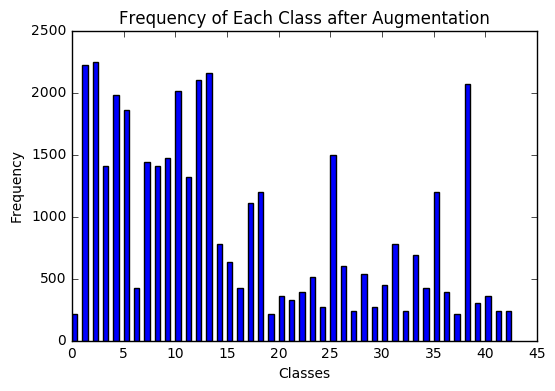


Completed plotting class frequency bar plot


In [13]:
#
# Bar plot showing the count of each class in the training set after augmentation
#
unique, counts = np.unique(y_train, return_counts=True)
plt.figure(3)
plt.bar(unique, counts, 0.5, color='b')
plt.xlabel('Classes')
plt.ylabel('Frequency')
plt.title('Frequency of Each Class after Augmentation')
plt.show()
plt.savefig('./images/class_freq_plot_after_augment')
print('\nCompleted plotting class frequency bar plot')

### Question 1 

_Describe how you preprocessed the data. Why did you choose that technique?_

**Answer:** 

Generating new images can be helpful to  eliminate the class imbalance problem.  New images can be generated by jittering the current images and adding them to the trainign set. Some of the techniques that are selected here: 

geometric transformations: translation and rotation

morphological transformations: erosion, dilation, opening, closing  

smoothing: blur, gaussian blur and median blur

brightness adjustment

Each class size is increased to 3500 by randomly selecting images from the original training set and applying the  jittering techniques randomly. 

In the second step, each image is converted to grayscale. This is followed by histogram normalization. Images can use a narrow band of pixel values in the total range of 0-255.  Histogram  normalization helps distribute the intensities so that the whole range is utilized in the images. The last step for preprocessing was normalization. Each image is brough to -0.5 to 0.5 range by subtracting mean and  dividing by 255(range/max). This helps prevent getting large numbers after multiplications and create equal range for each training examples so that there is no bias among data.

NOTE: Model didn't get performance improvement with the current architecture and hyperparameters when extra augmented images are added to the dataset so for the submission original dataset with only pre-processing are used.

In [14]:
### Generate data additional data (OPTIONAL!)
### and split the data into training/validation/testing sets here.
### Feel free to use as many code cells as needed.

x_train, y_train = shuffle(x_train, y_train)

x_train, x_valid, y_train, y_valid = train_test_split(
    x_train, y_train,
    test_size=0.2,
    random_state=832289)
    
n_train = len(x_train)
n_valid = len(x_valid)
n_test = len(x_test)
    
print("Training Set:   {} samples".format(n_train))
print("Validation Set: {} samples".format(n_valid))
print("Test Set:       {} samples".format(n_test))

Training Set:   31367 samples
Validation Set: 7842 samples
Test Set:       12630 samples


### Question 2

_Describe how you set up the training, validation and testing data for your model. **Optional**: If you generated additional data, how did you generate the data? Why did you generate the data? What are the differences in the new dataset (with generated data) from the original dataset?_

**Answer:**

Shuffled and split the data to 80% training and 20% validation sets.  In the case of augmentation, I divided the original training set into training and validation sets after generating extra images which provided a larger validation set.

In [15]:
### Define your architecture here.

In [23]:
# Implement LeNet - 5 like architecture
def lenet_model1(data_x, params, channel_count, keep_prob):

    # The LeNet architecture accepts a 32x32xC image as input, where C is the number of color channels.

    # Architecture
    # Layer 1: Convolutional. The output shape is 28x28x32.
    # Activation function
    # Pooling. The output shape is 14x14x32.
    # Layer 2: Convolutional. The output shape is 14x14x64.
    # Activation function
    # Layer 3: Convolutional. The output shape should be 10x10x128.
    # Activation function
    # Pooling. The output shape is 5x5x128.
    # Flatten. Flatten the output shape of the final pooling layer such that it's 1D instead of 3D.
    # The easiest way to do is by using tf.contrib.layers.flatten
    # Layer 3: Fully Connected. This has 1064 outputs.
    # Activation function
    # Dropout
    # Layer 4: Fully Connected. This has 532 outputs.
    # Activation function
    # Dropout
    # Layer 5: Fully Connected. This has 256 outputs.
    # Activation function
    # Layer 6: Fully Connected (Logits). 43 class outputs.
    # Output
    # Return the result of the 2nd fully connected layer.

    # Hyperparameters
    mu = params['mean']
    sigma = params['std']
    chn = channel_count

    layer_depth = {
        'conv_1': 32,
        'conv_2': 64,
        'conv_3': 128,
        'full_1': 1064,
        'full_2': 532,
        'full_3': 256,
        'out': params['class_count']
    }

    # Store layers weight & bias
    weights = {
        'conv_1': tf.Variable(tf.truncated_normal([5, 5, chn, layer_depth['conv_1']], 
                                                  mean=mu, stddev=sigma)),
        'conv_2': tf.Variable(tf.truncated_normal([5, 5, layer_depth['conv_1'], layer_depth['conv_2']],
                                                  mean=mu, stddev=sigma)),
        'conv_3': tf.Variable(tf.truncated_normal([5, 5, layer_depth['conv_2'], layer_depth['conv_3']],
                                                  mean=mu, stddev=sigma)),        
        'full_1': tf.Variable(tf.truncated_normal([5 * 5 * layer_depth['conv_3'], layer_depth['full_1']], 
                                                  mean=mu, stddev=sigma)),
        'full_2': tf.Variable(tf.truncated_normal([layer_depth['full_1'], layer_depth['full_2']],
                                                  mean=mu, stddev=sigma)),
        'full_3': tf.Variable(tf.truncated_normal([layer_depth['full_2'], layer_depth['full_3']],
                                                  mean=mu, stddev=sigma)),
        'out':    tf.Variable(tf.truncated_normal([layer_depth['full_3'], layer_depth['out']],
                                                  mean=mu, stddev=sigma))
    }
    biases = {
        'conv_1': tf.Variable(tf.zeros(layer_depth['conv_1'])),
        'conv_2': tf.Variable(tf.zeros(layer_depth['conv_2'])),
        'conv_3': tf.Variable(tf.zeros(layer_depth['conv_3'])),
        'full_1': tf.Variable(tf.zeros(layer_depth['full_1'])),
        'full_2': tf.Variable(tf.zeros(layer_depth['full_2'])),
        'full_3': tf.Variable(tf.zeros(layer_depth['full_3'])),
        'out':    tf.Variable(tf.zeros(layer_depth['out']))
    }

    # Layer 1: Convolutional. Input = 32x32xchn. Output = 28x28xlayer_depth['conv_1'].
    conv1 = tf.nn.conv2d(data_x, weights['conv_1'], strides=[1, 1, 1, 1], padding='VALID')
    conv1 = tf.nn.bias_add(conv1, biases['conv_1'])

    # Activation.
    conv1 = tf.nn.relu(conv1)

    # Pooling. Input = 28x28xlayer_depth['conv_1']. Output = 14x14xlayer_depth['conv_1'].
    conv1 = tf.nn.max_pool(conv1, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')
    # conv1 = tf.nn.dropout(conv1, keep_prob)

    # Layer 2: Convolutional. Input = 14x14xlayer_depth['conv_1']. Output = 14x14xlayer_depth['conv_2'].
    conv2 = tf.nn.conv2d(conv1, weights['conv_2'], strides=[1, 1, 1, 1], padding='SAME')
    conv2 = tf.nn.bias_add(conv2, biases['conv_2'])

    # Activation.
    conv2 = tf.nn.relu(conv2)    
    
    # Layer 2: Convolutional. Input = 14x14xlayer_depth['conv_2']. Output = 10x10xlayer_depth['conv_3'].
    conv3 = tf.nn.conv2d(conv2, weights['conv_3'], strides=[1, 1, 1, 1], padding='VALID')
    conv3 = tf.nn.bias_add(conv3, biases['conv_3'])

    # Activation.
    conv3 = tf.nn.relu(conv3)

    # Pooling. Input = 10x10xlayer_depth['conv_3']. Output = 5x5xlayer_depth['conv_3'].
    conv3 = tf.nn.max_pool(conv3, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')
    # conv2 = tf.nn.dropout(conv2, keep_prob)

    # Flatten. Input = 5x5xlayer_depth['conv_3']. Output = 1600.
    fc1 = flatten(conv3)

    # Layer 3: Fully Connected. Input = 1600. Output = layer_depth['full_1'].
    fc1 = tf.add(tf.matmul(fc1, weights['full_1']), biases['full_1'])

    # Activation.
    fc1 = tf.nn.relu(fc1)
    
    # Dropout
    fc1 = tf.nn.dropout(fc1, keep_prob)

    # Layer 4: Fully Connected. Input = layer_depth['full_1']. Output = layer_depth['full_2'].
    fc2 = tf.add(tf.matmul(fc1, weights['full_2']), biases['full_2'])

    # Activation.
    fc2 = tf.nn.relu(fc2)
    
    # Dropout
    fc2 = tf.nn.dropout(fc2, keep_prob)

    # Layer 5: Fully Connected. Input = layer_depth['full_2']. Output = layer_depth['full_3'].
    fc3 = tf.add(tf.matmul(fc2, weights['full_3']), biases['full_3'])

    # Activation.
    fc3 = tf.nn.relu(fc3)
    # fc3 = tf.nn.dropout(fc3, keep_prob)

    # Layer 5: Fully Connected. Input = layer_depth['full_3']. Output = class_count.
    logits = tf.add(tf.matmul(fc3, weights['out']), biases['out'])
    
    reg_term = params['l2_beta'] * (tf.nn.l2_loss(weights['conv_1']) + 
                                    tf.nn.l2_loss(weights['conv_2']) +
                                    tf.nn.l2_loss(weights['conv_3']) +
                                    tf.nn.l2_loss(weights['full_1']) + 
                                    tf.nn.l2_loss(weights['full_2']) +
                                    tf.nn.l2_loss(weights['full_3']))

    return logits, reg_term

### Question 3

_What does your final architecture look like? (Type of model, layers, sizes, connectivity, etc.)  For reference on how to build a deep neural network using TensorFlow, see [Deep Neural Network in TensorFlow
](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/b516a270-8600-4f93-a0a3-20dfeabe5da6/concepts/83a3a2a2-a9bd-4b7b-95b0-eb924ab14432) from the classroom._


**Answer:**

The implementation started from Lenet-5 and gradually improved to a deeper model.  A convolution layer without pooling is added to between the first and second conv layers of LeNet. Also the depth of each conv layer is increased. Fully convected layers are also increased by 1 and each layer now has increased depth. 

The input is 32x32xC image as input, where C is the number of color channels. In the final form single channel images are used so C = 1

Architecture
Layer 1: Convolutional: Filter = 5x5
                        Strides = 1x1
                        Padding = Valid
                        The output shape is 28x28x32

         Activation function is RELU

         Pooling: Kernel size = 2x2
                  Strides = 2x2
                  Padding = VALID 
                  The output shape is 14x14x32
                  
Layer 2: Convolutional: Filter = 5x5
                        Strides = 1x1
                        Padding = SAME
                        The output shape is 14x14x32

         Activation function is RELU

Layer 3: Convolutional: Filter = 5x5
                        Strides = 1x1
                        Padding = Valid
                        The output shape is 10x10x64

         Activation function is RELU

         Pooling: Kernel size = 2x2
                  Strides = 2x2
                  Padding = VALID 
                  The output shape is 5x5x64

Flatten. Flatten the output shape of the final pooling layer such that it's 1D instead of 3D using tf.contrib.layers.flatten. 

Layer 3: Fully Connected 
         1064 outputs
         Dropout with 0.5
         
         Activation function is RELU

Layer 4: Fully Connected 
         532 outputs
         Dropout with 0.5
         
         Activation function is RELU
         
Layer 5: Fully Connected. 
         256 outputs
         Activation function is RELU
        
Layer 6: Fully Connected (Logits)
         43 class outputs

Output

In [24]:
### Train your model here.

model_param_list = {
        'name': 'trial_6',
        'epoch': 100,
        'batch_size': 128,
        'mean': 0.,
        'std': 0.1,
        'class_count': len(class_info),
        'rate': 0.001,
        'l2_beta': 0.001,
        'dropout_prob': 0.5
}

model_name = model_param_list['name']
channel_count = x_train[0].shape[2]

# Placeholder for batch of input images
model_x = tf.placeholder(tf.float32, (None, 32, 32, channel_count))
# Placeholder for batch of output labels
model_y = tf.placeholder(tf.int32, None)

# One hot encode the training set - one vs all
one_hot_y = tf.one_hot(model_y, model_param_list['class_count'])

# Dropout only
keep_prob = tf.placeholder(tf.float32)

result_logits, reg_adder = lenet_model1(model_x, model_param_list, channel_count, keep_prob)

cross_entropy = tf.nn.softmax_cross_entropy_with_logits(result_logits, one_hot_y)

loss_operation = tf.reduce_mean(cross_entropy) + reg_adder
    
optimizer = tf.train.AdamOptimizer(learning_rate=model_param_list['rate'])

training_operation = optimizer.minimize(loss_operation)

# Model evaluation
correct_prediction = tf.equal(tf.argmax(result_logits, 1), tf.argmax(one_hot_y, 1))
accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

# Save
saver = tf.train.Saver()

sess = tf.Session(config=tf.ConfigProto(log_device_placement=True))

# Run the training data through the pipeline to train the model
# Before each epoch, shuffle the training set
# After each epoch, measure the loss and accuracy on the validation set
# Save the model after training
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    num_examples = len(x_train)
    print("\nTraining Model: {}\n".format(model_name))
    for i in range(model_param_list['epoch']):
        train_x, train_y = shuffle(x_train, y_train)
        for offset in range(0, num_examples, model_param_list['batch_size']):
            end = offset + model_param_list['batch_size']
            batch_x, batch_y = x_train[offset:end], y_train[offset:end]
            sess.run(training_operation, feed_dict={model_x: batch_x, model_y: batch_y,
                                                    keep_prob: model_param_list['dropout_prob']})

        num_valid_examples = len(x_valid)
        total_accuracy = 0.0
        total_loss = 0.0
        for offset2 in range(0, num_valid_examples, model_param_list['batch_size']):
            batch_valid_x, batch_valid_y = x_valid[offset2:offset2 + model_param_list['batch_size']], \
                                           y_valid[offset2:offset2 + model_param_list['batch_size']]
            accuracy, lss = sess.run([accuracy_operation, loss_operation],
                                feed_dict={model_x: batch_valid_x, model_y: batch_valid_y, keep_prob: 1.0})
            total_accuracy += (accuracy * len(batch_valid_x))
            total_loss += (lss * len(batch_valid_x))
        
        validation_accuracy = total_accuracy / num_valid_examples
        validation_loss = total_loss / num_valid_examples

        print("EPOCH {}: Validation Accuracy = {:.3f}, Validation Loss = {:.3f}".format(i + 1, 
                                                                                        validation_accuracy,
                                                                                        validation_loss))

    saver.save(sess, './models/' + model_name)


Training Model: trial_6

EPOCH 1: Validation Accuracy = 0.785, Validation Loss = 10.994
EPOCH 2: Validation Accuracy = 0.935, Validation Loss = 7.018
EPOCH 3: Validation Accuracy = 0.970, Validation Loss = 4.670
EPOCH 4: Validation Accuracy = 0.975, Validation Loss = 3.214
EPOCH 5: Validation Accuracy = 0.984, Validation Loss = 2.254
EPOCH 6: Validation Accuracy = 0.984, Validation Loss = 1.650
EPOCH 7: Validation Accuracy = 0.981, Validation Loss = 1.244
EPOCH 8: Validation Accuracy = 0.988, Validation Loss = 0.957
EPOCH 9: Validation Accuracy = 0.985, Validation Loss = 0.784
EPOCH 10: Validation Accuracy = 0.989, Validation Loss = 0.643
EPOCH 11: Validation Accuracy = 0.990, Validation Loss = 0.549
EPOCH 12: Validation Accuracy = 0.988, Validation Loss = 0.491
EPOCH 13: Validation Accuracy = 0.987, Validation Loss = 0.460
EPOCH 14: Validation Accuracy = 0.990, Validation Loss = 0.398
EPOCH 15: Validation Accuracy = 0.983, Validation Loss = 0.383
EPOCH 16: Validation Accuracy = 0.984

In [25]:
### Testing

print("\nTesting Model: {}\n".format(model_name))

load_file = './models/' + model_name

with tf.Session() as sess:
    saver.restore(sess, load_file)

    num_test_examples = len(x_test)
    total_accuracy = 0.0
    total_loss = 0.0
    
    for offset in range(0, num_test_examples, model_param_list['batch_size']):
        batch_test_x, batch_test_y = x_test[offset:offset + model_param_list['batch_size']], \
                                     y_test[offset:offset + model_param_list['batch_size']]
        accuracy, lss = sess.run([accuracy_operation, loss_operation],
                            feed_dict={model_x: batch_test_x, model_y: batch_test_y, keep_prob: 1.0})
        
        total_accuracy += (accuracy * len(batch_test_y))
        total_loss += (lss * len(batch_test_y))
    
    test_accuracy = total_accuracy / num_test_examples
    test_loss = total_loss / num_test_examples

    print("Test Accuracy = {:.3f}, Test Loss = {:.3f}".format(test_accuracy, test_loss))


Testing Model: trial_6

Test Accuracy = 0.956, Test Loss = 0.352


### Question 4

_How did you train your model? (Type of optimizer, batch size, epochs, hyperparameters, etc.)_


**Answer:**

model_param_list = {
        'name': 'trial_6',
        'epoch': 100,
        'batch_size': 128,
        'mean': 0.,
        'std': 0.1,
        'class_count': len(class_info),
        'rate': 0.001,
        'l2_beta': 0.001,
        'dropout_prob': 0.5
}

Hyperparameters are listed in a dictionary called "model_param_list". 
Epoch size is 100 and batch size is 128
For parameter initialization a mean of 0 and a small std deviation of 0.1 are found to be working better. Starting with small values are usually good for machine learning.
Classes are one-hot (one vs all) encoded. 
Softmax probabilities are calculated for the training class outputs. Then the distance between the softmax probability vector and true class vector is calculated using cross entropy. The loss function is assigned to be the mean of cross entropy. 
L2 Regularization term is added in the loss operation  with a multiplier 0.001. The initial value was 0.01 but later 0.005 and then 0.001 geneated better results as large multipliers heavily penalizes the model.
Dropout is also applied at the end of the first and second fully connected layer with probability 0.5.
Both regularization and dropout will help with the overfitting. 
Adam optimizer with learning rate 0.001 is chosen.

### Question 5


_What approach did you take in coming up with a solution to this problem? It may have been a process of trial and error, in which case, outline the steps you took to get to the final solution and why you chose those steps. Perhaps your solution involved an already well known implementation or architecture. In this case, discuss why you think this is suitable for the current problem._

**Answer:**

LeNet is used as the starting model with larger the layer depths based on the article provided in this notebook. CNNs are appropriate in the image classification problems. The images were simple and using 3 convolutional layers should be enough. The process is mostly trial - error while considering memory and time constraints. Decisions were made based on the accuracy and loss results. 

Model is evaluated using the validation set. Model predictions and validation classes were compared to get the accuracy of the model on the validation set. Learning loss and validation set loss are printed at each epoch. 

When the model is trained without generating extra images a validation accuracy of 0.99 and validation loss of  0.212 were achieved after 100 epoches. Looking at the trend of the validation loss, model stopped improving after 50 epoches. 

Using the model trained without generating extra images a test set accuracy of 0.956 was achieved. 

---

## Step 3: Test a Model on New Images

Take several pictures of traffic signs that you find on the web or around you (at least five), and run them through your classifier on your computer to produce example results. The classifier might not recognize some local signs but it could prove interesting nonetheless.

You may find `signnames.csv` useful as it contains mappings from the class id (integer) to the actual sign name.

### Implementation

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project. Once you have completed your implementation and are satisfied with the results, be sure to thoroughly answer the questions that follow.

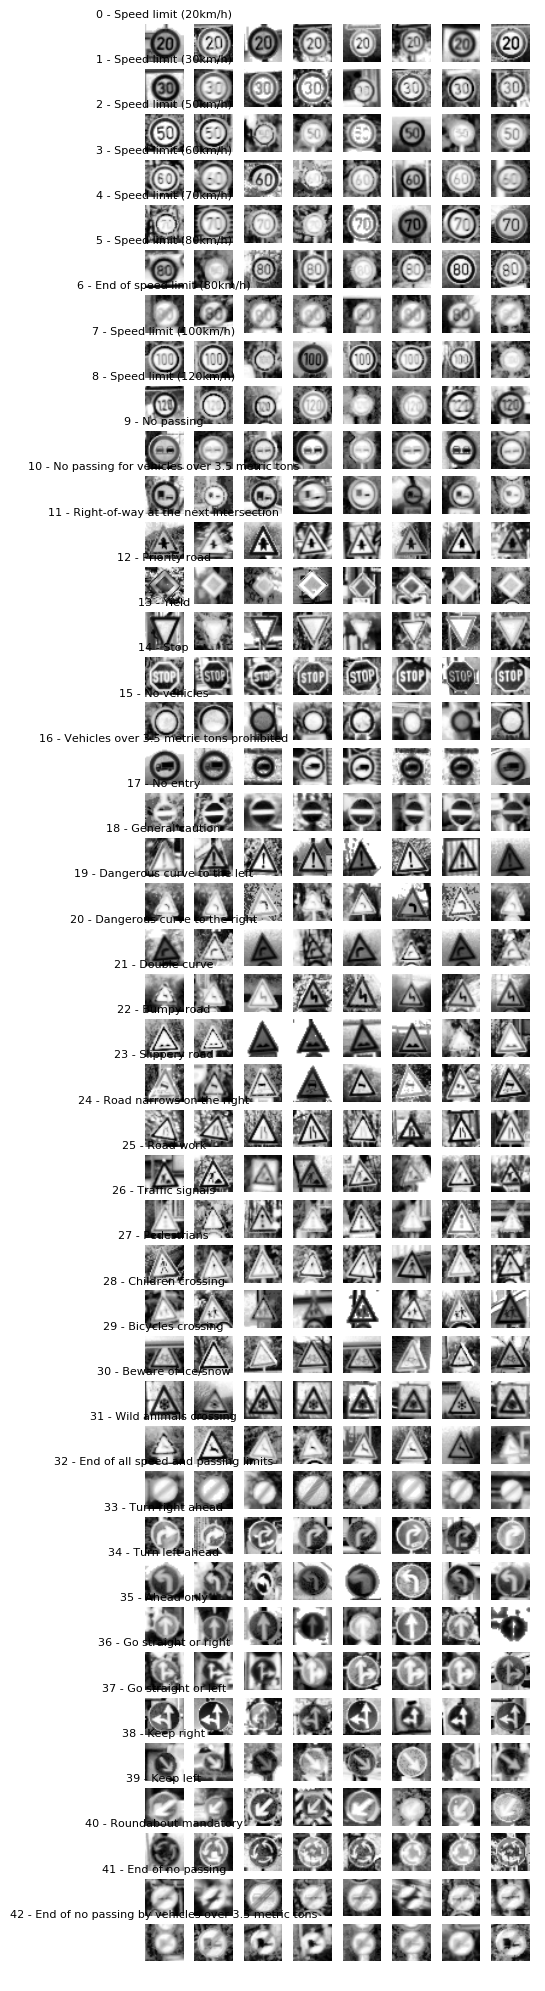

In [26]:
# First let's see the images for each class and their description

unq, unq_inv, unq_cnt = np.unique(y_train, return_inverse=True, return_counts=True)
class_index = np.split(np.argsort(unq_inv), np.cumsum(unq_cnt[:-1]))

n_size = len(unq)
grid = np.zeros((n_size, 8), dtype=int)
for cls in range(n_size):
    grid[cls, :] = np.random.choice(class_index[cls], size=8, replace=False)
grid_list = [int(i) for i in list(grid.reshape(n_size*8, 1))]

plt_grid = gridspec.GridSpec(43, 8)
plt_grid.update(wspace=0.01, hspace=0.02)
plt.figure(figsize=(5,25))

cnt = 0
for i in range(43*8):
    cnt += 1
    ax1 = plt.subplot(plt_grid[i])
    ax1.set_xticklabels([])
    ax1.set_yticklabels([])
    ax1.set_aspect('equal')
    plt.subplot(43,8,i+1)
    plt.imshow(x_train[grid_list[i]].squeeze(), cmap='gray')
    if cnt % 8 == 1:
        title = str(y_train[grid_list[i]]) + " - " + class_info[str(y_train[grid_list[i]])]['description']
        plt.title(title, fontsize = 8)
    plt.axis('off')

plt.show()

In [27]:
### Load the images and plot them here.

x_new_test = []
for i in range(7):
    img_path = './web_img/test_img' + str(i+1) + '.jpg'
    test_img = cv2.imread(img_path)
    x_new_test.append(test_img)

x_new_test = np.asarray(x_new_test)

x_new_test = pre_processing(x_new_test)


Preprocessing of images complete..



### Question 6

_Choose five candidate images of traffic signs and provide them in the report. Are there any particular qualities of the image(s) that might make classification difficult? It could be helpful to plot the images in the notebook._



**Answer:**

New signs are obtaiend from  streets of Frankfurt using Google Maps. 4 out of 7 images are similar to the images in training set however 1 image is not currently in the training set and 2 images are different than the examples in the training set. 

The "No Parking" sign is expected to be misclassified. 

The "Pedestrian Crossing" signs have the road crossing marks in addition to the pedestrian shape which might trick the model.

The model should be able to correctly predict 6 images at max.  

The quality/shape of the images are similar to the ones in the training and test sets so there is no particular aspect of these images (visual aspect like color, brightness, shape, skewness, position) that would trick the model to misclassify them.

In [28]:
### Run the predictions here.

load_file = './models/' + model_name

y_pred_prob = tf.nn.softmax(result_logits)
top5_pred_prob = tf.nn.top_k(y_pred_prob, 5)
y_pred_class = tf.argmax(result_logits, 1)

with tf.Session() as sess:
    
    saver.restore(sess, load_file)
    
    pred_class = sess.run(y_pred_class, feed_dict={model_x: x_new_test, keep_prob: 1.0})
    top5_prob = sess.run(top5_pred_prob, feed_dict={model_x: x_new_test, keep_prob: 1.0})

for i in range(7):
    print("Image " + str(i+1) + " belongs to class " + str(pred_class[i]) + " - " + class_info[str(pred_class[i])]['description'])

Image 1 belongs to class 12 - Priority road
Image 2 belongs to class 1 - Speed limit (30km/h)
Image 3 belongs to class 1 - Speed limit (30km/h)
Image 4 belongs to class 18 - General caution
Image 5 belongs to class 31 - Wild animals crossing
Image 6 belongs to class 16 - Vehicles over 3.5 metric tons prohibited
Image 7 belongs to class 38 - Keep right


### Question 7

_Is your model able to perform equally well on captured pictures when compared to testing on the dataset? The simplest way to do this check the accuracy of the predictions. For example, if the model predicted 1 out of 5 signs correctly, it's 20% accurate._

_**NOTE:** You could check the accuracy manually by using `signnames.csv` (same directory). This file has a mapping from the class id (0-42) to the corresponding sign name. So, you could take the class id the model outputs, lookup the name in `signnames.csv` and see if it matches the sign from the image._


**Answer:**

Data above shows that the model correctly predicted 4 out of 7 images giving  57% accuracy (compare to 95.6% testing set accuracy of the model). It correctly predicted the images that were already in the class list. 
Correctly predicted images are: 

Image 1 - priority road 

Image 3 - speed limit (30km/hr)

Image 4 - general caution

Image 6 - vehicles over 3.5 metric  tons prohibited. 

These images are already in the training set and their quality is good for the model to correctly predict them. 

It was already impossible to predict the remaining 3 as there were not in the class list.

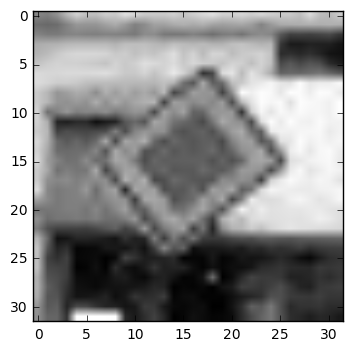

Top 5 classes with probabilities
Class #12 - Probability: 0.988 - Description: Priority road
Class #11 - Probability: 0.005 - Description: Right-of-way at the next intersection
Class #42 - Probability: 0.003 - Description: End of no passing by vehicles over 3.5 metric tons
Class #16 - Probability: 0.001 - Description: Vehicles over 3.5 metric tons prohibited
Class #7 - Probability: 0.001 - Description: Speed limit (100km/h)


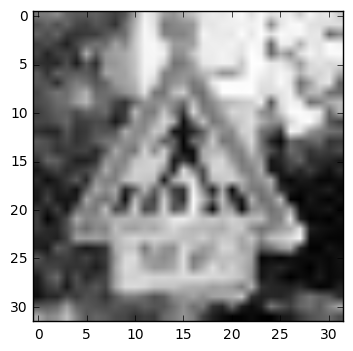

Top 5 classes with probabilities
Class #1 - Probability: 0.23 - Description: Speed limit (30km/h)
Class #18 - Probability: 0.177 - Description: General caution
Class #5 - Probability: 0.171 - Description: Speed limit (80km/h)
Class #25 - Probability: 0.062 - Description: Road work
Class #20 - Probability: 0.052 - Description: Dangerous curve to the right


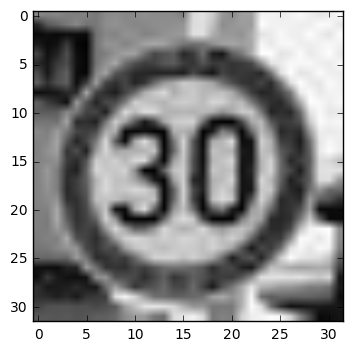

Top 5 classes with probabilities
Class #1 - Probability: 0.686 - Description: Speed limit (30km/h)
Class #18 - Probability: 0.202 - Description: General caution
Class #5 - Probability: 0.097 - Description: Speed limit (80km/h)
Class #31 - Probability: 0.008 - Description: Wild animals crossing
Class #6 - Probability: 0.003 - Description: End of speed limit (80km/h)


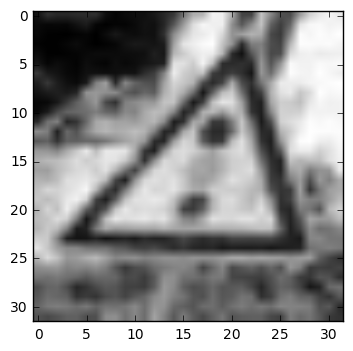

Top 5 classes with probabilities
Class #18 - Probability: 0.914 - Description: General caution
Class #1 - Probability: 0.039 - Description: Speed limit (30km/h)
Class #31 - Probability: 0.037 - Description: Wild animals crossing
Class #26 - Probability: 0.005 - Description: Traffic signals
Class #38 - Probability: 0.001 - Description: Keep right


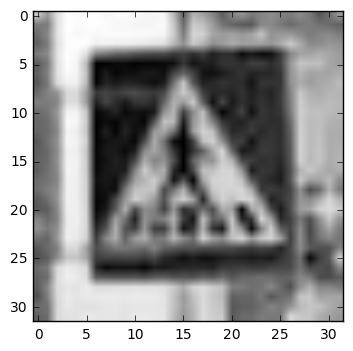

Top 5 classes with probabilities
Class #31 - Probability: 0.669 - Description: Wild animals crossing
Class #18 - Probability: 0.184 - Description: General caution
Class #37 - Probability: 0.049 - Description: Go straight or left
Class #39 - Probability: 0.033 - Description: Keep left
Class #1 - Probability: 0.03 - Description: Speed limit (30km/h)


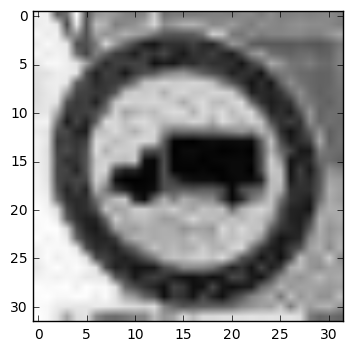

Top 5 classes with probabilities
Class #16 - Probability: 1.0 - Description: Vehicles over 3.5 metric tons prohibited
Class #9 - Probability: 0.0 - Description: No passing
Class #40 - Probability: 0.0 - Description: Roundabout mandatory
Class #20 - Probability: 0.0 - Description: Dangerous curve to the right
Class #10 - Probability: 0.0 - Description: No passing for vehicles over 3.5 metric tons


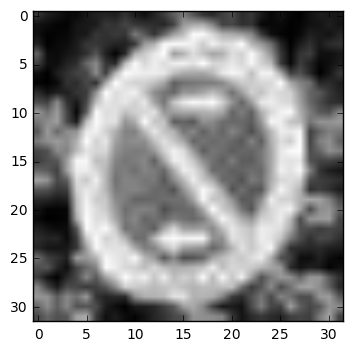

Top 5 classes with probabilities
Class #38 - Probability: 0.999 - Description: Keep right
Class #20 - Probability: 0.0 - Description: Dangerous curve to the right
Class #6 - Probability: 0.0 - Description: End of speed limit (80km/h)
Class #31 - Probability: 0.0 - Description: Wild animals crossing
Class #42 - Probability: 0.0 - Description: End of no passing by vehicles over 3.5 metric tons


In [29]:
### Visualize the softmax probabilities here.

for i in range(7):
    plt.imshow(x_new_test[i].squeeze(), cmap = "gray")
    plt.show()
    print("Top 5 classes with probabilities")
    for j in range(5):
        print("Class #" + str(top5_prob[1][i][j]) + 
              " - Probability: " + str(round(top5_prob[0][i][j],3)) +
              " - Description: " + class_info[str(top5_prob[1][i][j])]['description'])

### Question 8

*Use the model's softmax probabilities to visualize the **certainty** of its predictions, [`tf.nn.top_k`](https://www.tensorflow.org/versions/r0.12/api_docs/python/nn.html#top_k) could prove helpful here. Which predictions is the model certain of? Uncertain? If the model was incorrect in its initial prediction, does the correct prediction appear in the top k? (k should be 5 at most)*

`tf.nn.top_k` will return the values and indices (class ids) of the top k predictions. So if k=3, for each sign, it'll return the 3 largest probabilities (out of a possible 43) and the correspoding class ids.

Take this numpy array as an example:

```
# (5, 6) array
a = np.array([[ 0.24879643,  0.07032244,  0.12641572,  0.34763842,  0.07893497,
         0.12789202],
       [ 0.28086119,  0.27569815,  0.08594638,  0.0178669 ,  0.18063401,
         0.15899337],
       [ 0.26076848,  0.23664738,  0.08020603,  0.07001922,  0.1134371 ,
         0.23892179],
       [ 0.11943333,  0.29198961,  0.02605103,  0.26234032,  0.1351348 ,
         0.16505091],
       [ 0.09561176,  0.34396535,  0.0643941 ,  0.16240774,  0.24206137,
         0.09155967]])
```

Running it through `sess.run(tf.nn.top_k(tf.constant(a), k=3))` produces:

```
TopKV2(values=array([[ 0.34763842,  0.24879643,  0.12789202],
       [ 0.28086119,  0.27569815,  0.18063401],
       [ 0.26076848,  0.23892179,  0.23664738],
       [ 0.29198961,  0.26234032,  0.16505091],
       [ 0.34396535,  0.24206137,  0.16240774]]), indices=array([[3, 0, 5],
       [0, 1, 4],
       [0, 5, 1],
       [1, 3, 5],
       [1, 4, 3]], dtype=int32))
```

Looking just at the first row we get `[ 0.34763842,  0.24879643,  0.12789202]`, you can confirm these are the 3 largest probabilities in `a`. You'll also notice `[3, 0, 5]` are the corresponding indices.

**Answer:**

Model yielded high probabilities for the correct predictions.

Image 1 was classified corectly and the top classification is high.

    -Class 12 Priority road - Probability: 0.988
    
Image 2 -  Pedestrian crossing. This sign is different than the pedestrian sign in the dataset and model confused it with the  speed limit and general caution. Speed limits have circle band around number while caution signs have triangular band around different signs.  Model is having difficulty differentiating these.
    
    - Class 1 Speed limit (30km/h) - Probability: 0.23
    - Class 18 Description: General caution - Probability: 0.177
    
Image 3 is a 30km/hr speed limit sign. Model correctly classified it  with a rather low probability ~70%. I would expect the model to list all the speed signs one after another in the top 5 predictions but the second prediction is general caution which has a triangle shape.
    
    -Class 1 Speed limit (30km/h) - Probability: 0.686
    -Class 18 General caution - Probability: 0.202
    -Class 5 Speed limit (80km/h) - Probability: 0.097
    
Image 4  is a general caution sign and it was classified correctly with high probability. 
    
    -Class 18 - Probability: 0.914 - Description: General caution
    
Image 5, similar to image 2, is a yield sign for pedetrians. The pedestrian sign in the dataset is different than these images therefore model is mislabeling these signs. 
    
    -Class 31 - Probability: 0.669 - Description: Wild animals crossing
    -Class 18 - Probability: 0.184 - Description: General caution
    
Image 6 belongs to class 16 - Vehicles over 3.5 metric tons prohibited. Model classifed this sign without any problem.
    
    -Class 16 - Probability: 1.0 
    
Image 7 is a "No Parking" sign and currently is not present in the dataset. It was labeled as Keep Right sign with 0.999 probability which is wrong. 
    
    -Class 38 - Keep right - Probability: 0.999

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.